In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import tables
import uproot

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
HitsInfo=uproot.open("/media/ilker/writable/QPIX_DATA/Proton_Decay.root")
voxelFile=uproot.open("/home/ilker/Projects/ProtonDecayAnalysis/Voxelsv2.root")

In [43]:
Event=3
MC_Xhit = HitsInfo["event_tree/hit_start_x"].array(library="np")[Event]
MC_Yhit = HitsInfo["event_tree/hit_start_y"].array(library="np")[Event]
MC_Zhit = HitsInfo["event_tree/hit_start_z"].array(library="np")[Event]
MC_Ehit = HitsInfo["event_tree/hit_energy_deposit"].array(library="np")[Event]
MC_Ihit = HitsInfo["event_tree/hit_start_t"].array(library="np")[Event]



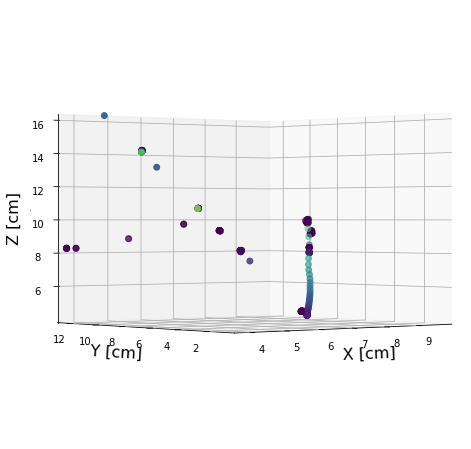

In [44]:
## Plot the MC truth
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit, MC_Yhit, MC_Zhit, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [cm]',fontsize=16)
ax.set_ylabel('Y [cm]',fontsize=16)
ax.set_zlabel('Z [cm]',fontsize=16)
#plt.colorbar(sc)
#ax.set_xlim(60,100)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)

mx = np.mean(MC_Xhit)
sx = np.std(MC_Xhit)
ax.set_xlim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Yhit)
sx = np.std(MC_Yhit)
ax.set_ylim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Zhit)
sx = np.std(MC_Zhit)
#ax.set_zlim(mx-1*sx,mx+1*sx)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)


ax.view_init(0, 230)
#ax.view_init(30, 130)

plt.show()

In [5]:
#Voxel_Info
Event=1
#voxelFile=uproot.open("/media/ilker/writable/UTA_Computer/Ilker/QPIX_Develop/Analysis/Voxels.root")
VoxeID=voxelFile["voxels/VoxelID"].array(library="np")[Event]
VX=voxelFile["voxels/x"].array(library="np")[Event]
VY=voxelFile["voxels/y"].array(library="np")[Event]
VZ=voxelFile["voxels/z"].array(library="np")[Event]
VQ=voxelFile["voxels/q"].array(library="np")[Event]

'''Reset_Mask = VQ>1*6250

VX = VX[Reset_Mask]
VY = VY[Reset_Mask]
VZ = VZ[Reset_Mask]
VQ = VQ[Reset_Mask]

'''

'Reset_Mask = VQ>1*6250\n\nVX = VX[Reset_Mask]\nVY = VY[Reset_Mask]\nVZ = VZ[Reset_Mask]\nVQ = VQ[Reset_Mask]\n\n'

In [6]:
len(VQ)

354

In [9]:
#Offset
VX=VX-min(VX)
VY=VY-min(VY)
VZ=VZ-min(VZ)
x_dim=int(max(VX))
y_dim=int(max(VY))
z_dim=int(max(VZ))

VOXELS = np.zeros((x_dim+1,y_dim+1,z_dim+1))

In [10]:
# sort through the event set the "turn on" the hit voxels 
cmap = cm.viridis
cmap = cm.afmhot
# cmap = cm.Reds
# cmap = cm.coolwarm
# cmap = cm.bwr
norm = Normalize(vmin=0, vmax=max(VQ))
norm = Normalize(vmin=min(VQ), vmax=max(VQ))

colors = np.empty(VOXELS.shape, dtype=object)
for q in range(0,len(VZ)):
    VOXELS[int(VX[q])][int(VY[q])][int(VZ[q])] = 1
    colors[int(VX[q])][int(VY[q])][int(VZ[q])] = cmap(norm(VQ[q]))


In [ ]:
# and plot everything
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#a,b,c is spacing in mm needs an extra dim
a,b,c = np.indices((x_dim+2,y_dim+2,z_dim+2))*4
# ax.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.2)

ax.voxels(a,b,c, VOXELS , facecolors=colors ,alpha=0.7)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)

ax.set_xlim([10,175])
ax.set_ylim([10,100])
ax.set_zlim([10,200])

ax.view_init(20, 230)
#ax.view_init(10, 250)
# ax.view_init(20, 230)

plt.show()

<ipython-input-54-29d08b0df697>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
